# Задачи од пребарување

## Претурање вода во садови

Имате на располагање 3 садови. Нивниот капацитет е 5, 8 и 10 соодветно.  На почетокот сите садови се празни. Задачата е да претурите 1 литар во садот од 5 литри. Можете да претурате вода меѓу садовите, но не знаете точно колку претурате бидејќи садовите не се обележани. Единствено може да го испразните садот од кој претурате или да го наполните до врв садот во кој претурате. Постои и чешма од која може да надополните некој сад до врвот. Секогаш може да ја истурите водата од некој сад. Скратено: имате на располагање 3 садови. Нивниот капацитет е (x, y, z) соодветно. Почетната состојба е (x_0, y_0, z_0). Задачата е да стигнете до посакуваната состојба.

In [3]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('OaJrwr4laPU')

In [7]:
from collections import deque
from itertools import combinations

In [8]:
def transfer_to_other_glass(source, sink, sink_capacity):
    return max(source - (sink_capacity - sink), 0), min(sink + source, sink_capacity) #ako istura voda kje e minimum 0 ne mozhe i minus
                                                                                      #ako dodava voda kje e max kapacitetot ne mozhe povekje

In [9]:
def expand_state(state):
    capacities = (5, 8, 10)
    glass_0, glass_1, glass_2 = state

    new_states = []

    if glass_0 < capacities[0]:
        new_states.append((capacities[0], glass_1, glass_2))
    if glass_1 < capacities[1]:
        new_states.append((glass_0, capacities[1], glass_2))
    if glass_2 < capacities[2]:
        new_states.append((glass_0, glass_1, capacities[2]))
    
    if glass_0 > 0:
        new_states.append((0, glass_1, glass_2))
    if glass_1 > 0:
        new_states.append((glass_0, 0, glass_2))
    if glass_2 > 0:
        new_states.append((glass_0, glass_1, 0))

    new_source, new_sink = transfer_to_other_glass(glass_0, glass_1, capacities[1])
    new_states.append((new_source, new_sink, glass_2))

    new_source, new_sink = transfer_to_other_glass(glass_1, glass_0, capacities[0])
    new_states.append((new_sink, new_source, glass_2))

    new_source, new_sink = transfer_to_other_glass(glass_0, glass_2, capacities[2])
    new_states.append((new_source, glass_1, new_sink))

    new_source, new_sink = transfer_to_other_glass(glass_2, glass_0, capacities[0])
    new_states.append((new_sink, glass_1, new_source))

    new_source, new_sink = transfer_to_other_glass(glass_1, glass_2, capacities[2])
    new_states.append((glass_0, new_source, new_sink))

    new_source, new_sink = transfer_to_other_glass(glass_2, glass_1, capacities[1])
    new_states.append((glass_0, new_sink, new_source))
    
    return new_states

На аудиториски вежби оваа задача ја решивме со функциите `expand_state_2()` и `transfer()`, така што би решението би работело за произволен број на садови.

In [10]:
CAPACITY = (5, 8, 10)

In [11]:
def transfer(state, i_source, i_sink):
    available = CAPACITY[i_sink] - state[i_sink]
    new_source = max(state[i_source] - available, 0)
    new_sink = min(state[i_source] + state[i_sink], CAPACITY[i_sink])
    new_state = list(state)
    new_state[i_source] = new_source
    new_state[i_sink] = new_sink
    return tuple(new_state)

transfer((5, 6, 6), 0, 1)

(3, 8, 6)

In [12]:
def expand_state_2(state):
    states = []
    for i in range(len(state)):
        new_state = list(state)
        new_state[i] = CAPACITY[i]
        states.append(tuple(new_state))
    for i in range(len(state)):
        new_state = list(state)
        new_state[i] = 0
        states.append(tuple(new_state))
    for c1, c2 in combinations(range(len(state)), 2):
        new_state = transfer(state, c1, c2)
        states.append(new_state)
        new_state = transfer(state, c2, c1)
        states.append(new_state)
    return states

start = (2, 1, 6)
expand_state(start)

[(5, 1, 6),
 (2, 8, 6),
 (2, 1, 10),
 (0, 1, 6),
 (2, 0, 6),
 (2, 1, 0),
 (0, 3, 6),
 (3, 0, 6),
 (0, 1, 8),
 (5, 1, 3),
 (2, 0, 7),
 (2, 7, 0)]

In [13]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state_2(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state: #ako proveruvame samo eden sat klk ima treba next_state[broj]=broj
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [14]:
def visualise_path(path):
    for states in zip(path, path[1:]):
        old_state, new_state = states
        print(old_state)
        print(tuple(map(lambda x, y: x - y, new_state, old_state)), 'change')
        print(new_state)
        print()

In [15]:
initial_state = (0, 0, 0)
goal_state = (1, 0, 0)
path = search_path(initial_state, goal_state)
visualise_path(path)

(0, 0, 0)
(0, 8, 0) change
(0, 8, 0)

(0, 8, 0)
(5, -5, 0) change
(5, 3, 0)

(5, 3, 0)
(-5, 0, 0) change
(0, 3, 0)

(0, 3, 0)
(3, -3, 0) change
(3, 0, 0)

(3, 0, 0)
(0, 8, 0) change
(3, 8, 0)

(3, 8, 0)
(0, -8, 8) change
(3, 0, 8)

(3, 0, 8)
(-2, 0, 2) change
(1, 0, 10)

(1, 0, 10)
(0, 0, -10) change
(1, 0, 0)



## Поставување кралици на шаховска табла

Распоредете N кралици на NxN шаховска табла така што кралиците нема да се напаѓаат.

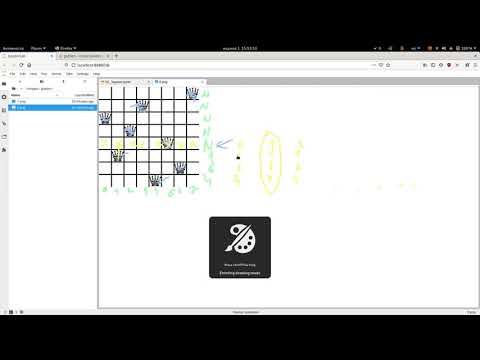

In [11]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('pf1rTaEibgI')

In [1]:
from collections import deque
import os

In [2]:
def is_valid(new_state, new_queen_i, new_queen_j):
    vertical_check = new_queen_j not in new_state
    if not vertical_check:
        return False
    main_diagonal = new_queen_i - new_queen_j
    anti_diagonal = new_queen_i + new_queen_j
    other_queens = new_state[:N - new_state.count(None)]
    for other_queen_i, other_queen_j in enumerate(other_queens):
        if other_queen_i - other_queen_j == main_diagonal:
            return False
        if other_queen_i + other_queen_j == anti_diagonal:
            return False
    return True

In [3]:
def expand_state(state):
    new_states = []
    available_places = state.count(None)
    if not available_places:
        return []
    new_queen_i = N - available_places
    for new_queen_j in range(N):
        if is_valid(state, new_queen_i, new_queen_j):
            new_state = list(state)
            new_state[new_queen_i] = new_queen_j
            new_states.append(tuple(new_state))
    return new_states

In [4]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state.count(None) == 0:
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [5]:
def visualise_queens(queens):
    import numpy as np
    import skimage
    from skimage import io

    if not queens:
        print('Не постои реше.astype(np.uint8)ние за N =', N)
        return
    border_color = (0, 0, 0, 1)
    queen = skimage.img_as_float(io.imread('images/queen.png'))
    table = np.zeros((queen.shape[0] * N, queen.shape[1] * N, queen.shape[2]))
    margin = queen.shape[0] // 20
    for i, j in enumerate(queens):
        table[i*queen.shape[0]:(i+1)*queen.shape[0], j*queen.shape[1]:(j+1)*queen.shape[1]] = queen
    for index in range(1, N):
        table[index * queen.shape[0] - margin: index * queen.shape[0] + margin] = border_color
        table[:, index * queen.shape[1] - margin: index * queen.shape[1] + margin] = border_color
    image_directory = 'queens'
    os.makedirs(f'images/{image_directory}', exist_ok=True)
    io.imsave(f'images/{image_directory}/{N}.png', 255*table.astype(np.uint8))
    return f'Погледни ја сликата images/{image_directory}/{N}.png'

In [6]:
N = 8
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

(7, 3, 0, 2, 5, 1, 6, 4)

In [7]:
visualise_queens(queens)

'Погледни ја сликата images/queens/8.png'

In [8]:
%%time

N = 12
initial_state = (None,) * N
queens = search(initial_state, alg='dfs')
queens

CPU times: user 7.73 ms, sys: 11 µs, total: 7.74 ms
Wall time: 6.78 ms


(11, 9, 7, 4, 2, 0, 6, 1, 10, 5, 3, 8)

In [10]:
%%time

N = 12
initial_state = (None,) * N
queens = search(initial_state, alg='bfs')
queens

CPU times: user 8.43 s, sys: 143 ms, total: 8.58 s
Wall time: 8.73 s


(0, 2, 4, 7, 9, 11, 5, 10, 1, 6, 8, 3)

## Судоку

Во случај да не знаете што е судоку - https://en.wikipedia.org/wiki/Sudoku.

Примерот кој го користиме е преземан од Википедија.

In [7]:
from collections import deque
import os
from pprint import pprint

In [8]:
g = (
    (5, 3, 0, 0, 7, 0, 0, 0, 0),
    (6, 0, 0, 1, 9, 5, 0, 0, 0),
    (0, 9, 8, 0, 0, 0, 0, 6, 0),
    (8, 0, 0, 0, 6, 0, 0, 0, 3),
    (4, 0, 0, 8, 0, 3, 0, 0, 1),
    (7, 0, 0, 0, 2, 0, 0, 0, 6),
    (0, 6, 0, 0, 0, 0, 2, 8, 0),
    (0, 0, 0, 4, 1, 9, 0, 0, 5),
    (0, 0, 0, 0, 8, 0, 0, 7, 9),
)

In [9]:
def check_end(state):
    return all([value != 0 for row in state for value in row])

check_end(g)

False

In [21]:
def find_next_zero(state):
    for i, row in enumerate(state):
        for j, value in enumerate(row):
            if value == 0:
                return i, j

find_next_zero(g)

(0, 2)

In [22]:
def expand_state(state):
    new_states = []
    location_of_next_zero = find_next_zero(state)
    if location_of_next_zero is None:
        return []
    i, j  = location_of_next_zero
    unavailable_row = set(state[i])
    unavailable_column = set([row[j] for row in state])
    unavailable_square = set([state[3*(i//3) + di][3*(j//3) + dj] for di in range(3) for dj in range(3)])
    unavailable = unavailable_row | unavailable_column | unavailable_square
    available = set(range(1, 10)) - unavailable
    if not available:
        return []
    for n in available:
        new_state = [list(row) for row in state]
        new_state[i][j] = n
        new_states.append(tuple([tuple(row) for row in new_state]))
    return new_states

expand_state(g)

[((5, 3, 1, 0, 7, 0, 0, 0, 0),
  (6, 0, 0, 1, 9, 5, 0, 0, 0),
  (0, 9, 8, 0, 0, 0, 0, 6, 0),
  (8, 0, 0, 0, 6, 0, 0, 0, 3),
  (4, 0, 0, 8, 0, 3, 0, 0, 1),
  (7, 0, 0, 0, 2, 0, 0, 0, 6),
  (0, 6, 0, 0, 0, 0, 2, 8, 0),
  (0, 0, 0, 4, 1, 9, 0, 0, 5),
  (0, 0, 0, 0, 8, 0, 0, 7, 9)),
 ((5, 3, 2, 0, 7, 0, 0, 0, 0),
  (6, 0, 0, 1, 9, 5, 0, 0, 0),
  (0, 9, 8, 0, 0, 0, 0, 6, 0),
  (8, 0, 0, 0, 6, 0, 0, 0, 3),
  (4, 0, 0, 8, 0, 3, 0, 0, 1),
  (7, 0, 0, 0, 2, 0, 0, 0, 6),
  (0, 6, 0, 0, 0, 0, 2, 8, 0),
  (0, 0, 0, 4, 1, 9, 0, 0, 5),
  (0, 0, 0, 0, 8, 0, 0, 7, 9)),
 ((5, 3, 4, 0, 7, 0, 0, 0, 0),
  (6, 0, 0, 1, 9, 5, 0, 0, 0),
  (0, 9, 8, 0, 0, 0, 0, 6, 0),
  (8, 0, 0, 0, 6, 0, 0, 0, 3),
  (4, 0, 0, 8, 0, 3, 0, 0, 1),
  (7, 0, 0, 0, 2, 0, 0, 0, 6),
  (0, 6, 0, 0, 0, 0, 2, 8, 0),
  (0, 0, 0, 4, 1, 9, 0, 0, 5),
  (0, 0, 0, 0, 8, 0, 0, 7, 9))]

In [23]:
def search(initial_state, alg):
    visited = {initial_state}
    states_queue = deque([initial_state])
    while states_queue:
        state_to_expand = states_queue.popleft()
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if check_end(next_state):
                    return next_state
                visited.add(next_state)
                if alg == 'dfs':
                    states_queue.appendleft(next_state)
                elif alg == 'bfs':
                    states_queue.append(next_state)

In [24]:
%%time

queens = search(g, alg='dfs')
queens

CPU times: user 5.56 ms, sys: 0 ns, total: 5.56 ms
Wall time: 5.58 ms


((5, 3, 4, 6, 7, 8, 9, 1, 2),
 (6, 7, 2, 1, 9, 5, 3, 4, 8),
 (1, 9, 8, 3, 4, 2, 5, 6, 7),
 (8, 5, 9, 7, 6, 1, 4, 2, 3),
 (4, 2, 6, 8, 5, 3, 7, 9, 1),
 (7, 1, 3, 9, 2, 4, 8, 5, 6),
 (9, 6, 1, 5, 3, 7, 2, 8, 4),
 (2, 8, 7, 4, 1, 9, 6, 3, 5),
 (3, 4, 5, 2, 8, 6, 1, 7, 9))

In [25]:
%%time

queens = search(g, alg='bfs')
queens

CPU times: user 62.8 ms, sys: 15 ms, total: 77.8 ms
Wall time: 65 ms


((5, 3, 4, 6, 7, 8, 9, 1, 2),
 (6, 7, 2, 1, 9, 5, 3, 4, 8),
 (1, 9, 8, 3, 4, 2, 5, 6, 7),
 (8, 5, 9, 7, 6, 1, 4, 2, 3),
 (4, 2, 6, 8, 5, 3, 7, 9, 1),
 (7, 1, 3, 9, 2, 4, 8, 5, 6),
 (9, 6, 1, 5, 3, 7, 2, 8, 4),
 (2, 8, 7, 4, 1, 9, 6, 3, 5),
 (3, 4, 5, 2, 8, 6, 1, 7, 9))

## Најкратка патека за коњот во шахот

Користејќи ја шаховската фигура коњ, најдете ја најкратката патека од едно до друго поле на шаховската табла.

In [10]:
from collections import deque

In [22]:
def expand_state(state):
    """
    Коњот се движи во Г форма, односно: или оди 2 полиња вертикално
    (нагоре (+) и надолу(-)), а 1 поле хоризонтално (налево (-) и надесно(+)),
    или обратно: 1 поле вертикално, а 2 полиња хоризонтално.
    Елементите од листата `possible_moves` се торки чиј прв елемент ќе се
    додаде на моменталниот ред каде се наоѓа коњот, а вториот елемент од
    торката ќе се додаде на моменталната колона каде се наоѓа коњот.
    Вака ќе симулираме придвижување на коњот по шаховската табла.
    """
    new_states = []
    i, j = state
    possible_moves = [(i-1, j-2), (i-1, j+2), (i+1, j-2), (i+1, j+2),
                      (i-2, j-1), (i-2, j+1), (i+2, j-1), (i+2, j+1)]
    for m, n in possible_moves:
        if m >= 0 and n >= 0 and m <= 7 and n <= 7:
            new_states.append((m, n))
    return new_states

In [23]:
def search_path(initial_state, goal_state):
    visited = {initial_state}
    states_queue = deque([[initial_state]])
    while states_queue:
        states_list = states_queue.popleft()
        state_to_expand = states_list[-1]
        for next_state in expand_state(state_to_expand):
            if next_state not in visited:
                if next_state == goal_state:
                    return states_list + [next_state]
                visited.add(next_state)
                states_queue.append(states_list + [next_state])
    return []

In [24]:
search_path(initial_state=(0, 0), goal_state=(3, 7))

[(0, 0), (1, 2), (0, 4), (1, 6), (3, 7)]

## Задачи за самостојно решавање

1. Од папката exercises ќе најдете задача за самостојна работа каде треба да го најдете најмалиот број преминувања преку реката за околу 17 групи. Нормално, не мора да ги решавате сите 17, но одберете си некоја задача.